<a href="https://colab.research.google.com/github/Shrutishahare/Person_detection_yolov8/blob/main/Person_Detection_yoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
# Install the Ultralytics library using pip
!pip install ultralytics

# Install the Roboflow library using pip
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
# Import the Roboflow and YOLO modules
from roboflow import Roboflow
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4HxggjyhyMMVfGbYBguP")
project = rf.workspace("shrutishahare").project("person-detection-ockgj")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Person-Detection-1 in yolov8:: 100%|██████████| 236/236 [00:00<00:00, 2630.43it/s]


In [4]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 112MB/s]


In [5]:
results = model.train(
    data='/content/Person-Detection-1/data.yaml',  # Path to the training data YAML file
    epochs=150,  # Number of training epochs
    batch=64,  # Batch size for training
    imgsz=640,  # Input image size
    seed=32,  # Random seed for reproducibility
    optimizer='NAdam',  # Optimizer algorithm
    weight_decay=1e-4,  # Weight decay for regularization
    momentum=0.937,  # Initial momentum for the optimizer
    cos_lr=True,  # Use cosine learning rate scheduling
    lr0=0.01,  # Initial learning rate
    lrf=1e-5,  # Final learning rate
    warmup_epochs=10,  # Number of warmup epochs
    warmup_momentum=0.5,  # Momentum during warm-up epochs
    close_mosaic=20,  # Parameter for close mosaic augmentation
    label_smoothing=0.2,  # Label smoothing parameter for regularization
    dropout=0.5,  # Dropout rate to prevent overfitting
    verbose=True  # Print verbose training information
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Person-Detection-1/data.yaml, epochs=150, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=NAdam, verbose=True, seed=32, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=20, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /content/Person-Detection-1/train/labels... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<00:00, 2502.32it/s]

train: New cache created: /content/Person-Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Person-Detection-1/valid/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 2309.58it/s]

val: New cache created: /content/Person-Detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: NAdam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.36G       2.06      3.045      1.819         58        640: 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all         23         92     0.0107      0.804      0.161     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       8.2G      2.121      3.059      1.772         94        640: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         23         92     0.0107      0.804      0.168      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.32G      2.117       3.11      1.739         97        640: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         23         92     0.0104      0.783      0.227     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.23G      2.164      2.609      1.785         56        640: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         23         92    0.00971      0.728      0.218     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.24G      2.037      2.387       1.73         66        640: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23         92     0.0114      0.859     0.0464     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.15G      2.323      2.656      2.049         91        640: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         23         92    0.00739      0.554      0.158     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.23G      2.056      2.361      1.856         86        640: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         23         92    0.00957      0.717     0.0252     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.23G      2.101       2.41      1.914         60        640: 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         23         92    0.00731      0.228     0.0363     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.26G      2.146      2.552      1.983         65        640: 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         23         92    0.00623      0.467     0.0106    0.00261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.29G      2.369       2.47       2.09         89        640: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         23         92      0.211       0.13     0.0893     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.17G      2.359      2.644      2.123         99        640: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         23         92     0.0101      0.761       0.12     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.14G      2.398      2.496      2.142         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         23         92      0.123     0.0652     0.0455    0.00675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.16G      2.329       2.53       2.15        107        640: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         23         92    0.00478      0.359    0.00404    0.00108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.23G      2.311      2.513      2.101         71        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         23         92      0.133      0.178     0.0861     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.19G      2.422      2.481       2.24        120        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         23         92     0.0075      0.391    0.00533    0.00189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.19G      2.411      2.633      2.143        106        640: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         23         92    0.00667        0.5    0.00534    0.00157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.13G      2.388      2.694      2.139         77        640: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         23         92    0.00233      0.174    0.00199   0.000937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.24G      2.395      2.444      2.167         88        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         23         92    0.00195      0.141    0.00115   0.000329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.17G      2.369      2.392      2.234        104        640: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         23         92    0.00087     0.0652   0.000508   0.000168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.18G      2.684      2.975      2.364         92        640: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         23         92    0.00087     0.0652   0.000508   0.000168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       8.2G      2.485      2.553      2.263         86        640: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         23         92   0.000435     0.0326   0.000268   8.18e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.38G      2.453      2.538      2.291         77        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23         92    0.00145      0.109   0.000847   0.000178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.17G      2.559      2.548      2.298         92        640: 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         23         92    0.00145      0.109   0.000847   0.000178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.06G      2.622      2.704      2.427         74        640: 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         23         92    0.00145      0.109   0.000848   0.000241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.25G      2.513      2.623      2.272         77        640: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         23         92   0.000435     0.0326   0.000349   5.73e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.06G      2.377      2.516      2.289         58        640: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         23         92   0.000725     0.0543   0.000393   4.68e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.16G      2.646      2.432      2.362        106        640: 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         23         92   0.000725     0.0543   0.000393   4.68e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.21G      2.434      2.604      2.194         91        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         23         92     0.0029      0.217    0.00192    0.00068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.25G       2.52      2.777      2.353         75        640: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23         92    0.00464      0.348    0.00343   0.000875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.38G      2.511       2.59      2.367         88        640: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         23         92    0.00464      0.348    0.00343   0.000875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.18G      2.363      2.442      2.241         73        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         23         92    0.00555      0.391    0.00428     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.32G      2.512      2.523      2.306         79        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         23         92   0.000149     0.0109   8.25e-05   8.25e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.38G      2.524      2.598      2.275         76        640: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         23         92     0.0196      0.478     0.0167    0.00434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       8.2G      2.368       2.53      2.242         57        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         23         92     0.0082      0.609    0.00933    0.00314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.28G      2.378      2.389      2.251         85        640: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         23         92   0.000725     0.0543   0.000396   8.59e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.26G        2.4      2.318      2.182         97        640: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         23         92    0.00332     0.0652    0.00363    0.00105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.23G      2.242      2.357      2.116         67        640: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         23         92    0.00397      0.293    0.00403    0.00135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.38G      2.331      2.311      2.178         73        640: 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         23         92     0.0131      0.315    0.00808    0.00311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.28G      2.247      2.179      2.083         94        640: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         23         92    0.00332      0.228    0.00349    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150       8.2G      2.056      2.265      2.033         64        640: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         23         92     0.0426      0.293     0.0242    0.00768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.26G       2.23      2.232      2.095         78        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         23         92       0.11      0.446     0.0806     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.14G      2.268      2.284      2.096         97        640: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         23         92   0.000444     0.0217   0.000156   5.43e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.21G      2.282      2.268      2.225         92        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         23         92     0.0263      0.152     0.0135    0.00404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.23G      2.279      2.296      2.095         59        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         23         92     0.0638      0.196     0.0274    0.00944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.28G      2.188      2.133      2.084         85        640: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         23         92       0.04      0.152      0.017    0.00515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.23G      2.124      2.063      2.028         88        640: 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         23         92     0.0114      0.152    0.00721    0.00256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.23G      2.069      2.067       1.96         88        640: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         23         92     0.0797      0.109     0.0529     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.18G      2.136      2.144      2.068         64        640: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23         92    0.00592      0.196    0.00484   0.000878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       8.2G      2.227       2.22      2.109         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         23         92     0.0682       0.13     0.0305    0.00752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.17G      2.195      2.264      2.074         91        640: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         23         92     0.0809      0.207     0.0523     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.21G      2.259      2.379       2.07         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         23         92     0.0972     0.0761     0.0503     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      8.32G      2.126      2.095      1.987         98        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         23         92     0.0367        0.5     0.0255     0.0072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.35G      2.063      2.049      1.919        124        640: 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         23         92     0.0667      0.272     0.0384     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.26G      1.969      2.006      1.939         67        640: 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         23         92     0.0441       0.13     0.0279    0.00726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.18G      2.103      2.021      2.024         85        640: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         23         92      0.146      0.268      0.131     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.17G      2.049      2.019      2.012         64        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         23         92    0.00947      0.467     0.0078    0.00237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      8.17G      2.027      1.973      1.926         81        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         23         92     0.0716      0.239     0.0692      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      8.16G      1.962      1.959      1.922         89        640: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         23         92      0.124      0.315      0.113     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.17G      1.934       1.96      1.869         73        640: 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23         92     0.0246     0.0978     0.0254    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.23G      1.958      1.903      1.911         77        640: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         23         92     0.0615      0.304     0.0597     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.17G       2.02      1.836      1.954        117        640: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         23         92      0.131      0.087     0.0429     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.06G       2.03      1.933      1.844        121        640: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         23         92       0.22      0.261      0.144     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.21G      2.024        1.8      1.883         88        640: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         23         92      0.206      0.163     0.0969     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.17G      1.929       1.81      1.879         79        640: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         23         92      0.004     0.0543    0.00117     0.0003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.23G      2.044      1.945      1.898         77        640: 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         23         92      0.315      0.239      0.217     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.28G      1.939      1.892      1.841         73        640: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         23         92     0.0692      0.359     0.0523     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.18G       1.94      1.808      1.874         69        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         23         92     0.0374      0.228     0.0246    0.00741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      8.21G      1.923      1.764      1.798        127        640: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         23         92      0.113      0.163      0.075     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.06G      1.911      1.867      1.859         72        640: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         23         92      0.293      0.261      0.219     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.32G      1.926      1.717      1.829         92        640: 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         23         92      0.132      0.141     0.0538     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.22G      1.797      1.637      1.758        117        640: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         23         92       0.11       0.38      0.103     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.06G      1.826      1.738      1.784         79        640: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         23         92     0.0557      0.348     0.0368     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.17G      1.827       1.68      1.785         84        640: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         23         92     0.0101      0.185    0.00482    0.00138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.23G      1.873      1.655      1.797         70        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         23         92      0.186       0.12      0.075     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.06G      1.862      1.741      1.794        104        640: 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         23         92      0.134       0.25     0.0848     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      8.17G      1.849      1.747       1.82         61        640: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         23         92     0.0181      0.359     0.0156    0.00519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.25G      1.829      1.793      1.778         74        640: 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         23         92     0.0705      0.359     0.0628     0.0199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      8.21G      1.786      1.638      1.772         66        640: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         23         92      0.172       0.38      0.161     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.28G      1.813      1.732      1.767         70        640: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         23         92     0.0668       0.13     0.0359    0.00988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      8.28G      1.813      1.726      1.781         54        640: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         23         92      0.087      0.152     0.0521     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.18G      1.785      1.636        1.7         66        640: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         23         92      0.101      0.109     0.0372     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.14G      1.819      1.705      1.762         64        640: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23         92      0.182      0.467      0.166     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.17G      1.861      1.712      1.747         52        640: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         23         92      0.231      0.413      0.201     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.14G      1.712      1.546      1.657         83        640: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         23         92       0.39       0.38      0.338      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.06G      1.887      1.608       1.81         65        640: 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         23         92       0.38      0.435      0.311      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150       8.2G      1.783      1.689      1.788         59        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         23         92      0.137      0.337      0.106     0.0401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.26G      1.723      1.554      1.664         98        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         23         92      0.528      0.486      0.501      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.14G      1.755      1.589      1.729         66        640: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         23         92      0.512      0.377      0.391      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      8.16G      1.663      1.436      1.629         71        640: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         23         92      0.503      0.424      0.443      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.17G      1.741      1.469      1.678        106        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         23         92      0.372      0.489      0.393      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.14G      1.805      1.524      1.739        115        640: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         23         92      0.585      0.467      0.539       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.16G      1.624      1.494      1.642         90        640: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         23         92      0.642      0.511      0.591      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      8.14G      1.732      1.532      1.704        104        640: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         23         92      0.428      0.565      0.499      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.14G      1.649      1.444      1.621         91        640: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         23         92      0.468      0.516      0.476      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.26G      1.726      1.376      1.602        123        640: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         23         92      0.556      0.517      0.472       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.26G      1.709      1.429      1.609        129        640: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         23         92      0.534      0.448       0.48      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.23G      1.666      1.395      1.605        120        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         23         92      0.513      0.543      0.549      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.16G      1.675      1.327      1.584         89        640: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         23         92      0.506      0.591      0.513      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150       8.3G      1.665      1.403      1.609         79        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         23         92      0.475      0.531      0.425      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.31G      1.652      1.352      1.609         73        640: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         23         92      0.491       0.62      0.573      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      8.17G      1.655      1.366      1.604        113        640: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         23         92      0.672       0.62      0.647      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.06G      1.588      1.407      1.567         76        640: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         23         92      0.503       0.62       0.56      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.25G      1.548      1.302      1.548         70        640: 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         23         92      0.657      0.603      0.647      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.06G       1.64      1.354      1.635         65        640: 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         23         92      0.504       0.63       0.49      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.26G      1.558       1.29      1.516        104        640: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         23         92      0.625      0.724      0.706      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.32G      1.606      1.292      1.554         78        640: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         23         92      0.591      0.685      0.658      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.16G      1.509      1.259      1.509         66        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         23         92       0.62      0.587      0.624      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.17G      1.549      1.233      1.547         72        640: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         23         92       0.59      0.564      0.586      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150       8.2G      1.601      1.307      1.578         75        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         23         92      0.549      0.598       0.58      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.16G      1.524      1.214       1.49        130        640: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         23         92      0.695      0.533      0.647      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.14G      1.569      1.242      1.557         94        640: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         23         92      0.635      0.641      0.714      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.17G      1.547      1.283      1.523        101        640: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         23         92      0.577      0.578      0.663       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150       8.2G      1.544      1.287      1.553         68        640: 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         23         92      0.678      0.663      0.701      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.28G      1.548      1.326      1.554         71        640: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         23         92      0.712      0.663      0.706      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.26G      1.523      1.223      1.535         68        640: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         23         92      0.733       0.63      0.697      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.28G      1.564      1.201      1.506         99        640: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         23         92      0.657      0.685      0.681      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.23G      1.553      1.305      1.531         77        640: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         23         92      0.751      0.656      0.701      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      8.16G      1.536      1.182      1.521         66        640: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23         92      0.635      0.663      0.667      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.16G      1.482      1.158      1.492         70        640: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         23         92      0.702       0.62      0.715       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.14G      1.451      1.181       1.47         88        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         23         92      0.763       0.63        0.7      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.23G      1.412      1.123      1.439         91        640: 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         23         92      0.732      0.595      0.721      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.17G      1.482      1.226      1.518         65        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         23         92      0.768      0.613      0.754      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       8.2G      1.505      1.215      1.465         88        640: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         23         92      0.693      0.652      0.768      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.16G      1.447      1.154      1.477         51        640: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         23         92      0.853       0.63      0.777      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150       8.2G      1.495      1.176      1.497         94        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         23         92       0.85      0.641      0.783      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.35G      1.466      1.157      1.455         97        640: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         23         92      0.761      0.692      0.781      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.38G      1.481      1.161      1.486         74        640: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         23         92      0.782      0.652       0.78      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.17G       1.46       1.19      1.477         53        640: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         23         92      0.767      0.685      0.796      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.25G       1.48      1.142      1.462         65        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         23         92      0.779      0.674      0.787      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.16G      1.436      1.146       1.41         75        640: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         23         92      0.795      0.696      0.786      0.354


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.18G      1.445      1.158      1.516         62        640: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         23         92      0.778      0.707      0.782      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.18G      1.352       1.06      1.419         43        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         23         92      0.807      0.725      0.797      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.17G      1.368      1.051       1.43         56        640: 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         23         92      0.811      0.698      0.789      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.14G       1.48      1.149      1.499         79        640: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         23         92      0.817      0.685      0.786      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.18G      1.403      1.112       1.51         38        640: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         23         92      0.844      0.685      0.791       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      8.18G      1.393      1.102      1.513         49        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         23         92      0.825      0.696      0.795      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.18G      1.389        1.1      1.464         46        640: 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         23         92      0.845      0.707      0.811      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.18G      1.378     0.9882      1.474         41        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         23         92      0.847       0.72      0.814      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.18G      1.306     0.9543      1.399         61        640: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         23         92      0.854      0.717      0.815      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      8.18G      1.313     0.9932      1.382         63        640: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         23         92      0.843      0.707      0.801      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.18G      1.353      1.005      1.449         49        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         23         92      0.877      0.699      0.809      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      8.18G      1.409      1.031       1.46         48        640: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         23         92      0.884      0.696      0.807      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.18G      1.402       1.04      1.499         44        640: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         23         92      0.877      0.699      0.809      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.17G      1.408      1.053      1.494         44        640: 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23         92      0.876      0.685      0.807      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      8.18G      1.416      1.068      1.446         56        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         23         92      0.866      0.685       0.81      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.18G      1.352      1.011       1.43         55        640: 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         23         92      0.867      0.685      0.811      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.16G      1.331      1.007      1.391         57        640: 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         23         92      0.882      0.685      0.812      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      8.18G      1.365     0.9815      1.409         43        640: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         23         92      0.889      0.696      0.811      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      8.18G      1.392      1.087       1.49         38        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         23         92      0.876      0.707       0.82      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.18G      1.372      1.062      1.456         77        640: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         23         92      0.861      0.707      0.821      0.365



150 epochs completed in 0.103 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


                   all         23         92      0.855      0.707       0.82      0.363
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


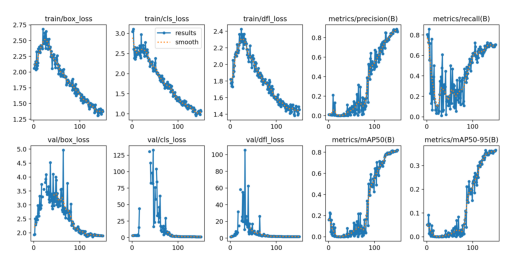

<Figure size 640x480 with 0 Axes>

Plotted image saved to: /content/runs/detect/train/plotted_results.png


In [19]:
import matplotlib.pyplot as plt
import cv2
image_path = "/content/runs/detect/train/results.png"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
output_path = "/content/runs/detect/train/plotted_results.png"
plt.savefig(output_path, bbox_inches="tight", pad_inches=0)
plt.show()
print(f"Plotted image saved to: {output_path}")

In [7]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b61699fd310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
from ultralytics import YOLO
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)



image 1/11 /content/Person-Detection-1/test/images/00051_png_jpg.rf.f54b05a0aca4bc513052f176a8ede745.jpg: 640x640 1 person, 21.2ms
image 2/11 /content/Person-Detection-1/test/images/00055_png_jpg.rf.51d1bc98591dc320ab790d38041120c7.jpg: 640x640 1 person, 23.2ms
image 3/11 /content/Person-Detection-1/test/images/00088_png_jpg.rf.85bb8b60eca252cb9ffa673583cab51c.jpg: 640x640 2 persons, 10.3ms
image 4/11 /content/Person-Detection-1/test/images/00095_png_jpg.rf.a8b0ccd2959d55a3e27d2cfdcdd73689.jpg: 640x640 1 person, 11.3ms
image 5/11 /content/Person-Detection-1/test/images/00097_png_jpg.rf.a688db10f7198e91b0aa89a10ba4dff2.jpg: 640x640 1 person, 8.1ms
image 6/11 /content/Person-Detection-1/test/images/00122_png_jpg.rf.a05e27c6cd427139748a7762a38caa24.jpg: 640x640 2 persons, 10.2ms
image 7/11 /content/Person-Detection-1/test/images/3_png.rf.c0c89c6cf7ebdbfe9d6fee236cb39fdd.jpg: 640x640 10 persons, 8.2ms
image 8/11 /content/Person-Detection-1/test/images/Orang-21-_png.rf.7c9c1a83c9431787ed30

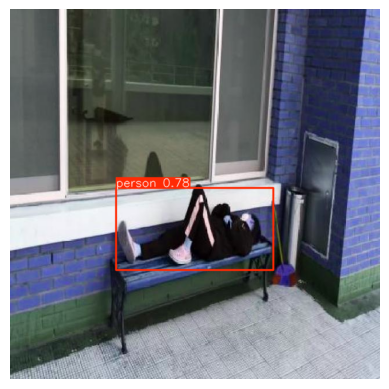

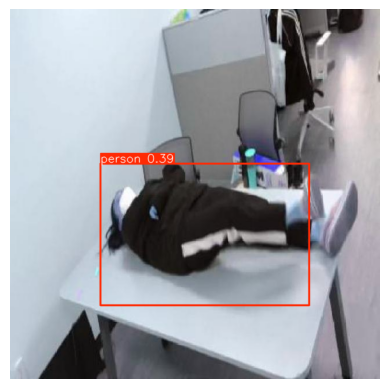

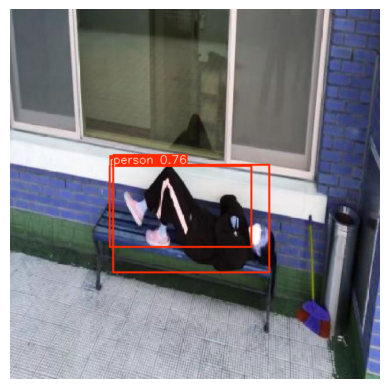

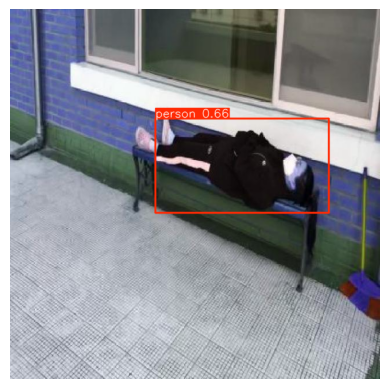

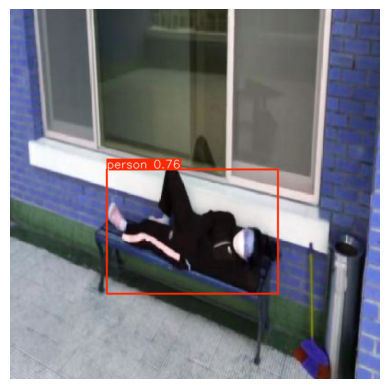

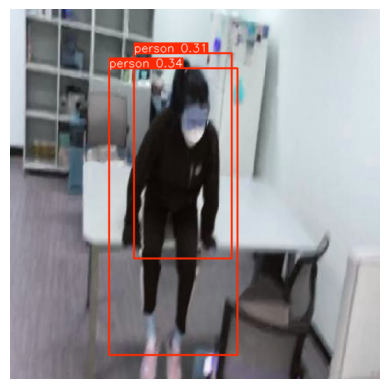

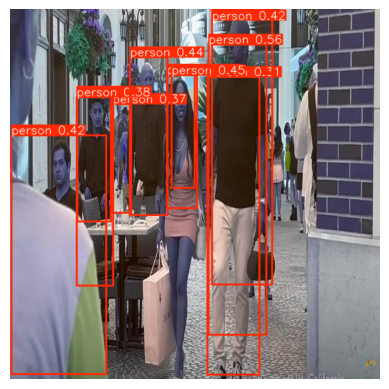

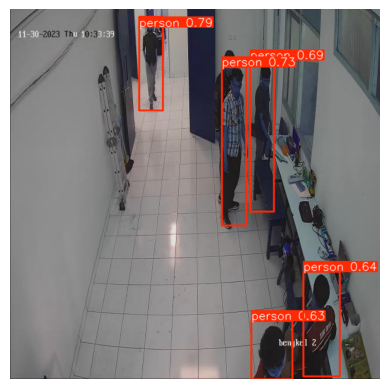

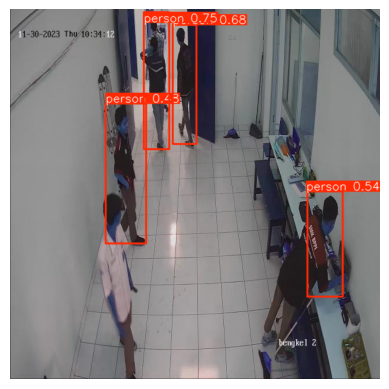

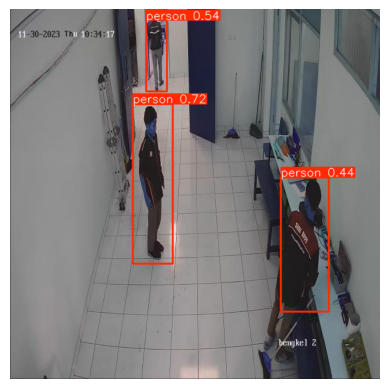

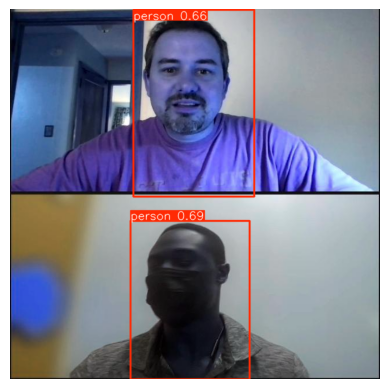

In [9]:
import os
predictions = model.predict(source='/content/Person-Detection-1/test/images')
for p in predictions:
  %matplotlib inline
  plt.axis('off')
  plt.imshow(p.plot())
  plt.show()

In [10]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

def save_predictions_with_labels(model, image_dir, output_dir):
    """
    Save YOLOv8 predicted images and their corresponding labels.

    Args:
        model (YOLO): Trained YOLOv8 model.
        image_dir (str): Directory containing input images.
        output_dir (str): Directory to save predicted images and labels.
    """
    # Run predictions
    results = model.predict(source=image_dir, save=False)  # Disable saving images by YOLO

    # Create output directories for images and labels
    images_output_dir = os.path.join(output_dir, "images")
    labels_output_dir = os.path.join(output_dir, "labels")
    os.makedirs(images_output_dir, exist_ok=True)
    os.makedirs(labels_output_dir, exist_ok=True)

    for idx, result in enumerate(results):
        # Save visualized prediction (image with bounding boxes)
        plt.axis("off")  # Remove axis
        plt.imshow(result.plot())  # Plot image with bounding boxes
        image_file = os.path.join(images_output_dir, f"predicted_{idx}.jpg")  # Save as JPG
        plt.savefig(image_file, bbox_inches="tight", pad_inches=0)
        plt.close()

        # Save corresponding label file
        label_file = os.path.join(labels_output_dir, f"predicted_{idx}.txt")
        with open(label_file, "w") as f:
            if hasattr(result, "boxes") and result.boxes is not None:
                for box in result.boxes:
                    cls = int(box.cls)  # Class ID
                    x_center, y_center, width, height = box.xywhn.tolist()[0]  # Normalized bbox
                    f.write(f"{cls} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    print(f"Predicted images saved in: {images_output_dir}")
    print(f"Predicted labels saved in: {labels_output_dir}")


# Example Usage
if __name__ == "__main__":
    # Load your trained YOLOv8 model

    # Define input image directory and output directory
    image_dir = "/content/Person-Detection-1/test/images"  # Directory of input images
    output_dir = "/content/predict_results"               # Output directory for predictions

    # Save predictions and labels
    save_predictions_with_labels(model, image_dir, output_dir)



image 1/11 /content/Person-Detection-1/test/images/00051_png_jpg.rf.f54b05a0aca4bc513052f176a8ede745.jpg: 640x640 1 person, 17.6ms
image 2/11 /content/Person-Detection-1/test/images/00055_png_jpg.rf.51d1bc98591dc320ab790d38041120c7.jpg: 640x640 1 person, 8.3ms
image 3/11 /content/Person-Detection-1/test/images/00088_png_jpg.rf.85bb8b60eca252cb9ffa673583cab51c.jpg: 640x640 2 persons, 12.7ms
image 4/11 /content/Person-Detection-1/test/images/00095_png_jpg.rf.a8b0ccd2959d55a3e27d2cfdcdd73689.jpg: 640x640 1 person, 8.9ms
image 5/11 /content/Person-Detection-1/test/images/00097_png_jpg.rf.a688db10f7198e91b0aa89a10ba4dff2.jpg: 640x640 1 person, 7.8ms
image 6/11 /content/Person-Detection-1/test/images/00122_png_jpg.rf.a05e27c6cd427139748a7762a38caa24.jpg: 640x640 2 persons, 7.5ms
image 7/11 /content/Person-Detection-1/test/images/3_png.rf.c0c89c6cf7ebdbfe9d6fee236cb39fdd.jpg: 640x640 10 persons, 10.4ms
image 8/11 /content/Person-Detection-1/test/images/Orang-21-_png.rf.7c9c1a83c9431787ed30db

In [15]:
import os

def print_directory_contents(directory):
    """
    Print the contents of all .txt files in the specified directory.

    Args:
        directory (str): Path to the directory containing .txt files.
    """
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return

    files = sorted(os.listdir(directory))  # Sort for consistent order
    for file in files:
        if file.endswith('.txt'):  # Only process .txt files
            file_path = os.path.join(directory, file)
            print(f"\nContents of {file_path}:")
            with open(file_path, 'r') as f:
                print(f.read().strip())  # Print file content without trailing newlines


# Example usage
predictions_dir = '/content/predict_results/labels'  # Replace with your directory path
ground_truth_dir = '/content/Person-Detection-1/test/labels'  # Replace with your directory path

print("Predictions:")
print_directory_contents(predictions_dir)

print("\nGround Truth:")
print_directory_contents(ground_truth_dir)


Predictions:

Contents of /content/predict_results/labels/predicted_0.txt:
0 0.499516 0.594555 0.424162 0.222708

Contents of /content/predict_results/labels/predicted_1.txt:
0 0.526590 0.609816 0.564194 0.383118

Contents of /content/predict_results/labels/predicted_10.txt:
0 0.487314 0.786704 0.321724 0.426591
0 0.496610 0.254694 0.325669 0.505932

Contents of /content/predict_results/labels/predicted_2.txt:
0 0.489754 0.566939 0.423028 0.290326
0 0.460452 0.533151 0.383350 0.219211

Contents of /content/predict_results/labels/predicted_3.txt:
0 0.627139 0.423129 0.467921 0.253892

Contents of /content/predict_results/labels/predicted_4.txt:
0 0.492814 0.601235 0.462859 0.335522

Contents of /content/predict_results/labels/predicted_5.txt:
0 0.441568 0.547574 0.345728 0.774608
0 0.466747 0.396317 0.264651 0.555082

Contents of /content/predict_results/labels/predicted_6.txt:
0 0.614935 0.488013 0.156642 0.783435
0 0.467758 0.331171 0.063124 0.304027
0 0.374879 0.343570 0.100583 0.427

In [18]:
import os
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def load_labels_from_directory(directory):
    """
    Load bounding box labels from a directory.
    Each file contains bounding box data in YOLO format.
    """
    labels = []
    files = sorted(os.listdir(directory))
    for file in files:
        if file.endswith('.txt'):
            filepath = os.path.join(directory, file)
            with open(filepath, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    class_id = int(parts[0])  # Class ID
                    bbox = [float(x) for x in parts[1:]]  # Bounding box (cx, cy, w, h)
                    labels.append((class_id, bbox))
    return labels

def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) for two bounding boxes.
    Args:
        box1: [cx, cy, w, h] (normalized)
        box2: [cx, cy, w, h] (normalized)
    Returns:
        IoU (float)
    """
    # Convert (cx, cy, w, h) to (x1, y1, x2, y2)
    x1_1, y1_1, x2_1, y2_1 = box1[0] - box1[2] / 2, box1[1] - box1[3] / 2, box1[0] + box1[2] / 2, box1[1] + box1[3] / 2
    x1_2, y1_2, x2_2, y2_2 = box2[0] - box2[2] / 2, box2[1] - box2[3] / 2, box2[0] + box2[2] / 2, box2[1] + box2[3] / 2

    # Intersection coordinates
    x1 = max(x1_1, x1_2)
    y1 = max(y1_1, y1_2)
    x2 = min(x2_1, x2_2)
    y2 = min(y2_1, y2_2)

    # Calculate areas
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (x2_1 - x1_1) * (y2_1 - y1_1)
    box2_area = (x2_2 - x1_2) * (y2_2 - y1_2)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

def match_predictions_to_ground_truth(predictions, ground_truth, iou_threshold=0.5):
    """
    Match predictions to ground truth based on IoU and return binary classification results.
    """
    y_true = []
    y_pred = []

    for pred in predictions:
        matched = False
        for gt in ground_truth:
            if pred[0] == gt[0]:  # Same class
                iou = calculate_iou(pred[1], gt[1])
                if iou >= iou_threshold:
                    matched = True
                    break
        y_true.append(1)  # Ground truth is a person (class 0)
        y_pred.append(1 if matched else 0)

    # Remaining unmatched ground truths (false negatives)
    unmatched_gt = len(ground_truth) - len(predictions)
    y_true.extend([1] * unmatched_gt)
    y_pred.extend([0] * unmatched_gt)

    return y_true, y_pred

# Directories
predictions_dir = "/content/predict_results/labels"
ground_truth_dir = "/content/Person-Detection-1/test/labels"

# Load predictions and ground truth
predictions = load_labels_from_directory(predictions_dir)
ground_truth = load_labels_from_directory(ground_truth_dir)

# Match predictions and ground truth
y_true, y_pred = match_predictions_to_ground_truth(predictions, ground_truth)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 1.0
Recall: 0.7142857142857143
F1 Score: 0.8333333333333334
